In [2]:
%%bash 
#Make constraint input. 
rm ../../asyn_c2/resid_sel_all.dat
for ((c=1;c<=140-1;c+=3))do
 for ((j=$c+3;j<=140;j+=3))do
  echo $c $j >> ../../asyn_c2/resid_sel_all.dat
done 
done


In [49]:
import pandas as pd
import numpy as np
import subprocess
import glob
import matplotlib.pyplot as plt
import mdtraj as md

#The contact map is in distance (Angstong)

cwd = os.getcwd()
data_f=str(cwd)+"../../asyn_c2/"

AF_contacts_file=data_f+"mean.csv"
AF_resid_sel_file=data_f+"resid_sel_all.dat"
AF_contacts_stdev_file=data_f+"std.csv"
AF_contacts=pd.read_csv(AF_contacts_file)
AF_contacts_stdev=pd.read_csv(AF_contacts_stdev_file)
AF_contacts
AF_contacts_stdev

exp=[]
labels=[]
lista=[]
residue_pairs=np.loadtxt(AF_resid_sel_file,usecols=(0,1))
for i in range(len(residue_pairs)):

    r1=int(residue_pairs[i][0])
    r2=str(int(residue_pairs[i][1]))
    #This is to accoun that the trajectory starts residues from 1 while the AF contact map from 0.
    r1_m1=int(residue_pairs[i][0]-1)
    
    r1_label=str(r1)
    r2_label=r2
    
    #The first index of loc needs to be integer and minus1, since it starts from 0. index 2 needs to be str and reads properly
    exp.append([AF_contacts.loc[r1_m1].at[r2],AF_contacts_stdev.loc[r1_m1].at[r2]])
    labels.append('resid_'+r1_label+'-'+r2_label)

    lista.append([int(r1_label),int(r2_label)])

exp = np.array(exp)

labels=np.array(labels)
labels
print(exp)
print (labels)
len(exp)
print(len(lista))
print(lista)
with open(data_f+'AF_contacts_constr.txt', 'w') as f:
    f.write("# DATA=JCOUPLINGS\n")
    for line in range(len(exp)):
        f.write(str(labels[line])+" "+str(exp[line,0])+" "+str(exp[line,1])+"\n")
        

[[ 8.70885581  2.03555774]
 [14.48042088  3.3141192 ]
 [18.18024841  3.74473241]
 ...
 [ 8.9340265   2.28111091]
 [15.41935819  3.67459325]
 [ 9.46369734  1.64092582]]
['resid_1-4' 'resid_1-7' 'resid_1-10' ... 'resid_133-136' 'resid_133-139'
 'resid_136-139']
1081
[[1, 4], [1, 7], [1, 10], [1, 13], [1, 16], [1, 19], [1, 22], [1, 25], [1, 28], [1, 31], [1, 34], [1, 37], [1, 40], [1, 43], [1, 46], [1, 49], [1, 52], [1, 55], [1, 58], [1, 61], [1, 64], [1, 67], [1, 70], [1, 73], [1, 76], [1, 79], [1, 82], [1, 85], [1, 88], [1, 91], [1, 94], [1, 97], [1, 100], [1, 103], [1, 106], [1, 109], [1, 112], [1, 115], [1, 118], [1, 121], [1, 124], [1, 127], [1, 130], [1, 133], [1, 136], [1, 139], [4, 7], [4, 10], [4, 13], [4, 16], [4, 19], [4, 22], [4, 25], [4, 28], [4, 31], [4, 34], [4, 37], [4, 40], [4, 43], [4, 46], [4, 49], [4, 52], [4, 55], [4, 58], [4, 61], [4, 64], [4, 67], [4, 70], [4, 73], [4, 76], [4, 79], [4, 82], [4, 85], [4, 88], [4, 91], [4, 94], [4, 97], [4, 100], [4, 103], [4, 106], 

In [138]:
#Make the plumed file

pdb=data_f+'../priors/topol_asyn_C2.pdb'
xtc=data_f+'../priors/asyn_C2.xtc'

topology = md.load(pdb).topology
traj = md.load(xtc, top=pdb)



lista_CB=[]
for i in lista:
    if (topology.select("residue "+str(i[0])+" and name CA and (resname  GLY PRO)")):
        res1=topology.select("residue "+str(i[0])+" and name CA and (resname  GLY PRO)")
        #print(i[0],res1)
    if (topology.select("residue "+str(i[1])+" and name CA and (resname  GLY PRO)")):
        res2=topology.select("residue "+str(i[1])+" and name CA and (resname  GLY PRO)")
        #print(i[1],res2)
    if (topology.select("residue "+str(i[0])+" and name CB")):
        res1=topology.select('name CB and residue '+str(i[0]))
        #print(i[0],res1)
    if (topology.select("residue "+str(i[1])+" and name CB")):
        res2=topology.select('name CB and residue '+str(i[1]))
        #print(i[1],res2)
    lista_CB.append([int(res1),int(res2)])

print('CB-atomlist')
for j in lista_CB:
    print(j[0],j[1])
print(len(lista_CB))
print(lista_CB)

for i in lista:
    print(i)


distance_nm=md.compute_distances(traj,lista_CB)


#This is converting to Angstorng
calc=distance_nm[:] * 10
print(calc)

with open(data_f+'AF_contacts_calc.txt', 'w') as f:
    for line in range(len(calc[:,0])):

        f.write(str(line)+" ")
        for j in range(len(lista)): 
            f.write(str(calc[line,j])+" ")
        
        f.write("\n")        
        
#print(calc[:,0])

/var/folders/y_/gjd0c6hx6tz2nvvyhp0sh1380000gn/T/ipykernel_28885/1214805406.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (topology.select("residue "+str(i[0])+" and name CA and (resname  GLY PRO)")):
/var/folders/y_/gjd0c6hx6tz2nvvyhp0sh1380000gn/T/ipykernel_28885/1214805406.py:19: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (topology.select("residue "+str(i[1])+" and name CA and (resname  GLY PRO)")):
/var/folders/y_/gjd0c6hx6tz2nvvyhp0sh1380000gn/T/ipykernel_28885/1214805406.py:25: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (topology.select(

CB-atomlist
408 530
147 275
1377 1476
1130 1221
1428 1551
1183 1249
1857 1944
1728 1769
1183 1288
1551 1590
322 408
275 373
895 943
1518 1590
441 586
1643 1686
837 895
620 756
943 1055
201 322
201 239
108 147
275 408
441 486
1011 1055
678 716
1319 1428
716 756
837 943
620 716
441 530
586 620
1590 1686
239 322
985 1094
6 108
586 716
1094 1130
985 1055
1518 1551
1428 1476
1249 1319
620 678
108 239
985 1011
408 441
1094 1183
239 275
1686 1728
1221 1319
1815 1857
1476 1551
1221 1249
1288 1319
373 486
1221 1288
1249 1288
1551 1643
1055 1130
1686 1769
943 985
1094 1221
1857 1894
1518 1643
1249 1377
51 147
1815 1894
716 796
796 895
1288 1428
486 530
322 441
1769 1857
486 620
322 373
756 796
1476 1590
239 373
1590 1643
716 837
1428 1518
1055 1183
1055 1094
6 51
586 678
147 201
678 756
943 1011
530 586
530 620
108 201
1011 1130
1944 1994
1011 1094
678 796
1728 1815
837 985
1769 1815
1130 1249
1894 1944
100
[[408, 530], [147, 275], [1377, 1476], [1130, 1221], [1428, 1551], [1183, 1249], [1857, 1

In [51]:

file=open(data_f+'CG_distances.dat', 'w')
file.write("\n")
for i in range(0,calc.shape[1]):
    file.write(str(np.average(calc[:,i]))+"\n")
file.close()
file_name=data_f+'AF_CG.dat'
lis=subprocess.call(['paste'] + glob.glob(data_f+'AF_contacts_constr.txt') + [data_f+'CG_distances.dat'] , stdout=open(file_name, 'w') )
MD=np.loadtxt(file_name,usecols=(3))
AF=np.loadtxt(file_name,usecols=(1))

In [52]:
rg_A=md.compute_rg(traj)*10


In [53]:
import random
#Now I am selecting only the distnaces that have average lower  than <20 in the MD. 
#The reason is that AF has upper bound ad 21 A.
MD=np.loadtxt(file_name,usecols=(3))
resid=list(np.loadtxt(file_name,usecols=(0),dtype=str))

res_lt1=[]
file=open(data_f+"resid_sel_all_lt20.dat", 'w')
          
for i in range(0,len(resid)):
    if(MD[i]<20):
        res_lt1.append(str(resid[i].split("-")[0].split("_")[1])+" "+str(resid[i].split("-")[1]))


print(len(res_lt1))

#Select 100 random values
res_lt1=random.sample(res_lt1, 100)
for i in range(0,len(res_lt1)):
    file.write(str(res_lt1[i])+"\n")

file.close()

122


In [54]:


#The contact
#AF_resid_sel_file=data_f+"resid_sel_all.dat"
data_f="../../asyn_c2/"
AF_contacts_file=data_f+"mean.csv"
AF_resid_sel_file=data_f+"resid_sel_all_lt20.dat"
AF_contacts_stdev_file=data_f+"std.csv"
AF_contacts=pd.read_csv(AF_contacts_file)
AF_contacts_stdev=pd.read_csv(AF_contacts_stdev_file)
AF_contacts
AF_contacts_stdev

exp=[]
labels=[]
lista=[]
residue_pairs=np.loadtxt(AF_resid_sel_file,usecols=(0,1))
for i in range(len(residue_pairs)):

    r1=int(residue_pairs[i][0])
    r2=str(int(residue_pairs[i][1]))
    #This is to accoun that the trajectory starts residues from 1 while the AF contact map from 0.
    r1_m1=int(residue_pairs[i][0]-1)
    
    r1_label=str(r1)
    r2_label=r2
    
    #The first index of loc needs to be integer and minus1, since it starts from 0. index 2 needs to be str and reads properly
    exp.append([AF_contacts.loc[r1_m1].at[r2],AF_contacts_stdev.loc[r1_m1].at[r2]])
    labels.append('resid_'+r1_label+'-'+r2_label)

    lista.append([int(r1_label),int(r2_label)])

exp = np.array(exp)

labels=np.array(labels)
labels
print(exp)
print (labels)
len(exp)
print(len(lista))
print(lista)
with open(data_f+'AF_contacts_constr.txt', 'w') as f:
    f.write("# DATA=JCOUPLINGS\n")
    for line in range(len(exp)):
        f.write(str(labels[line])+" "+str(exp[line,0])+" "+str(exp[line,1])+"\n")


lista_CB=[]      
for i in lista:
    if (topology.select("residue "+str(i[0])+" and name CA and (resname  GLY PRO)")):
        res1=topology.select("residue "+str(i[0])+" and name CA and (resname  GLY PRO)")

    if (topology.select("residue "+str(i[1])+" and name CA and (resname  GLY PRO)")):
        res2=topology.select("residue "+str(i[1])+" and name CA and (resname  GLY PRO)")

    if (topology.select("residue "+str(i[0])+" and name CB")):
        res1=topology.select('name CB and residue '+str(i[0]))

    if (topology.select("residue "+str(i[1])+" and name CB")):
        res2=topology.select('name CB and residue '+str(i[1]))

    lista_CB.append([int(res1),int(res2)])

print('CB-atomlist')
for j in lista_CB:
    print(j[0],j[1])
print(len(lista_CB))
print(lista_CB)

for i in lista:
    print(i)


      
traj = md.load(xtc, top=pdb)

distance_nm=md.compute_distances(traj,lista_CB)

#This is converting to Angstrom
calc=distance_nm[:] * 10
print(calc)

with open(data_f+'AF_contacts_calc.txt', 'w') as f:
    for line in range(len(calc[:,0])):

        f.write(str(line)+" ")
        for j in range(len(lista)): 
            f.write(str(calc[line,j])+" ")
        
        f.write("\n")        

[[16.75152031  4.10018531]
 [20.45869597  2.84176319]
 [13.76386119  3.47976687]
 [16.09831191  4.08676201]
 [17.84335022  4.05637636]
 [14.27338181  3.95441747]
 [14.99925278  3.53591789]
 [ 8.56893534  2.2489726 ]
 [18.39243456  3.92251329]
 [ 8.48559491  2.22840209]
 [15.75372225  3.95072877]
 [16.90361694  3.34785218]
 [ 9.34829634  2.00092816]
 [14.55928647  3.46690048]
 [15.61282606  4.89335318]
 [ 9.36315872  1.86804613]
 [ 9.47028994  2.00468132]
 [16.48166284  4.23358901]
 [18.22358159  4.10636548]
 [21.00141913  2.19127315]
 [ 9.71978312  2.23001543]
 [ 8.81213756  2.36050944]
 [20.1353685   3.07296451]
 [ 9.38249003  1.87277519]
 [ 8.98408678  1.81035427]
 [ 9.14749216  2.02167444]
 [13.21633278  3.67085437]
 [ 9.10760562  2.14939383]
 [15.09336806  3.82926028]
 [12.67403188  3.98202205]
 [12.25538778  3.8218989 ]
 [ 9.1951985   2.02602851]
 [14.55893103  3.51913813]
 [17.67105572  3.4102429 ]
 [17.50818594  4.34524504]
 [14.48042088  3.3141192 ]
 [14.63131088  4.41850681]
 

/var/folders/y_/gjd0c6hx6tz2nvvyhp0sh1380000gn/T/ipykernel_28885/2783166914.py:53: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (topology.select("residue "+str(i[0])+" and name CA and (resname  GLY PRO)")):
/var/folders/y_/gjd0c6hx6tz2nvvyhp0sh1380000gn/T/ipykernel_28885/2783166914.py:56: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (topology.select("residue "+str(i[1])+" and name CA and (resname  GLY PRO)")):
/var/folders/y_/gjd0c6hx6tz2nvvyhp0sh1380000gn/T/ipykernel_28885/2783166914.py:62: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (topology.select(

CB-atomlist
408 530
147 275
1377 1476
1130 1221
1428 1551
1183 1249
1857 1944
1728 1769
1183 1288
1551 1590
322 408
275 373
895 943
1518 1590
441 586
1643 1686
837 895
620 756
943 1055
201 322
201 239
108 147
275 408
441 486
1011 1055
678 716
1319 1428
716 756
837 943
620 716
441 530
586 620
1590 1686
239 322
985 1094
6 108
586 716
1094 1130
985 1055
1518 1551
1428 1476
1249 1319
620 678
108 239
985 1011
408 441
1094 1183
239 275
1686 1728
1221 1319
1815 1857
1476 1551
1221 1249
1288 1319
373 486
1221 1288
1249 1288
1551 1643
1055 1130
1686 1769
943 985
1094 1221
1857 1894
1518 1643
1249 1377
51 147
1815 1894
716 796
796 895
1288 1428
486 530
322 441
1769 1857
486 620
322 373
756 796
1476 1590
239 373
1590 1643
716 837
1428 1518
1055 1183
1055 1094
6 51
586 678
147 201
678 756
943 1011
530 586
530 620
108 201
1011 1130
1944 1994
1011 1094
678 796
1728 1815
837 985
1769 1815
1130 1249
1894 1944
100
[[408, 530], [147, 275], [1377, 1476], [1130, 1221], [1428, 1551], [1183, 1249], [1857, 1

In [55]:
topology = md.load(pdb).topology
print(topology)

table, bonds = topology.to_dataframe()
print(table.head())

<mdtraj.Topology with 1 chains, 140 residues, 2016 atoms, 2027 bonds>
   serial name element  resSeq resName  chainID segmentID
0       1    N       N       1     MET        0          
1       2    H       H       1     MET        0          
2       3   H2       H       1     MET        0          
3       4   H3       H       1     MET        0          
4       5   CA       C       1     MET        0          


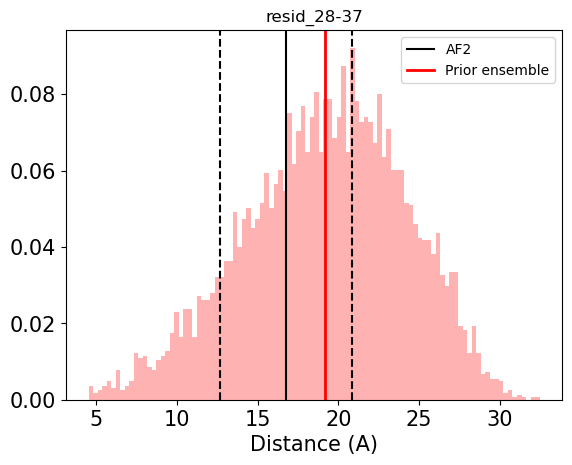

In [56]:
# import libraries

i=1
# plot experimental average and error
_ = plt.axvline(exp[i-1,0],c='k',label="AF2")
_ = plt.axvline(exp[i-1,0]-exp[i-1,1],c='k',linestyle="--")
_ = plt.axvline(exp[i-1,0]+exp[i-1,1],c='k',linestyle="--")

# Plot calculated average
average = np.average(calc[:,i-1])
_ = plt.axvline(average,c='r',label="Prior ensemble",lw=2)

# plot histogram of the data
_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='r')
plt.title(labels[i-1])
plt.xlabel("Distance (A)",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()
plt.savefig(data_f+str(labels[i-1])+'.pdf')

In this case we can see that the calculated average is within the experimental error, which is great. 
Let's consider now a different datapoint

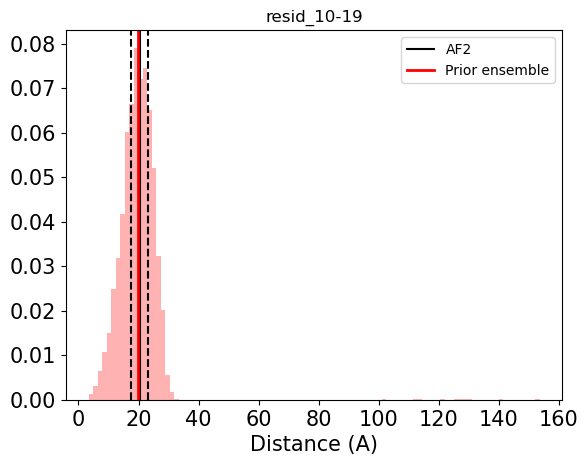

In [57]:
i=2    
# plot experimental average and error
_ = plt.axvline(exp[i-1,0],c='k',label="AF2")
_ = plt.axvline(exp[i-1,0]-exp[i-1,1],c='k',linestyle="--")
_ = plt.axvline(exp[i-1,0]+exp[i-1,1],c='k',linestyle="--")

# Plot calculated average
average = np.average(calc[:,i-1])
_ = plt.axvline(average,c='r',label="Prior ensemble",lw=2)

# plot histogram of the data
_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='r')

plt.title(labels[i-1])
plt.legend()

plt.xlabel("Distance (A)",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig(data_f+str(labels[i-1])+'.pdf')
plt.show()
plt.close()

In this case the calculated average is clearly far away from the experiment. In general, it is convenient to plot all the datapoints together in the following fashion:


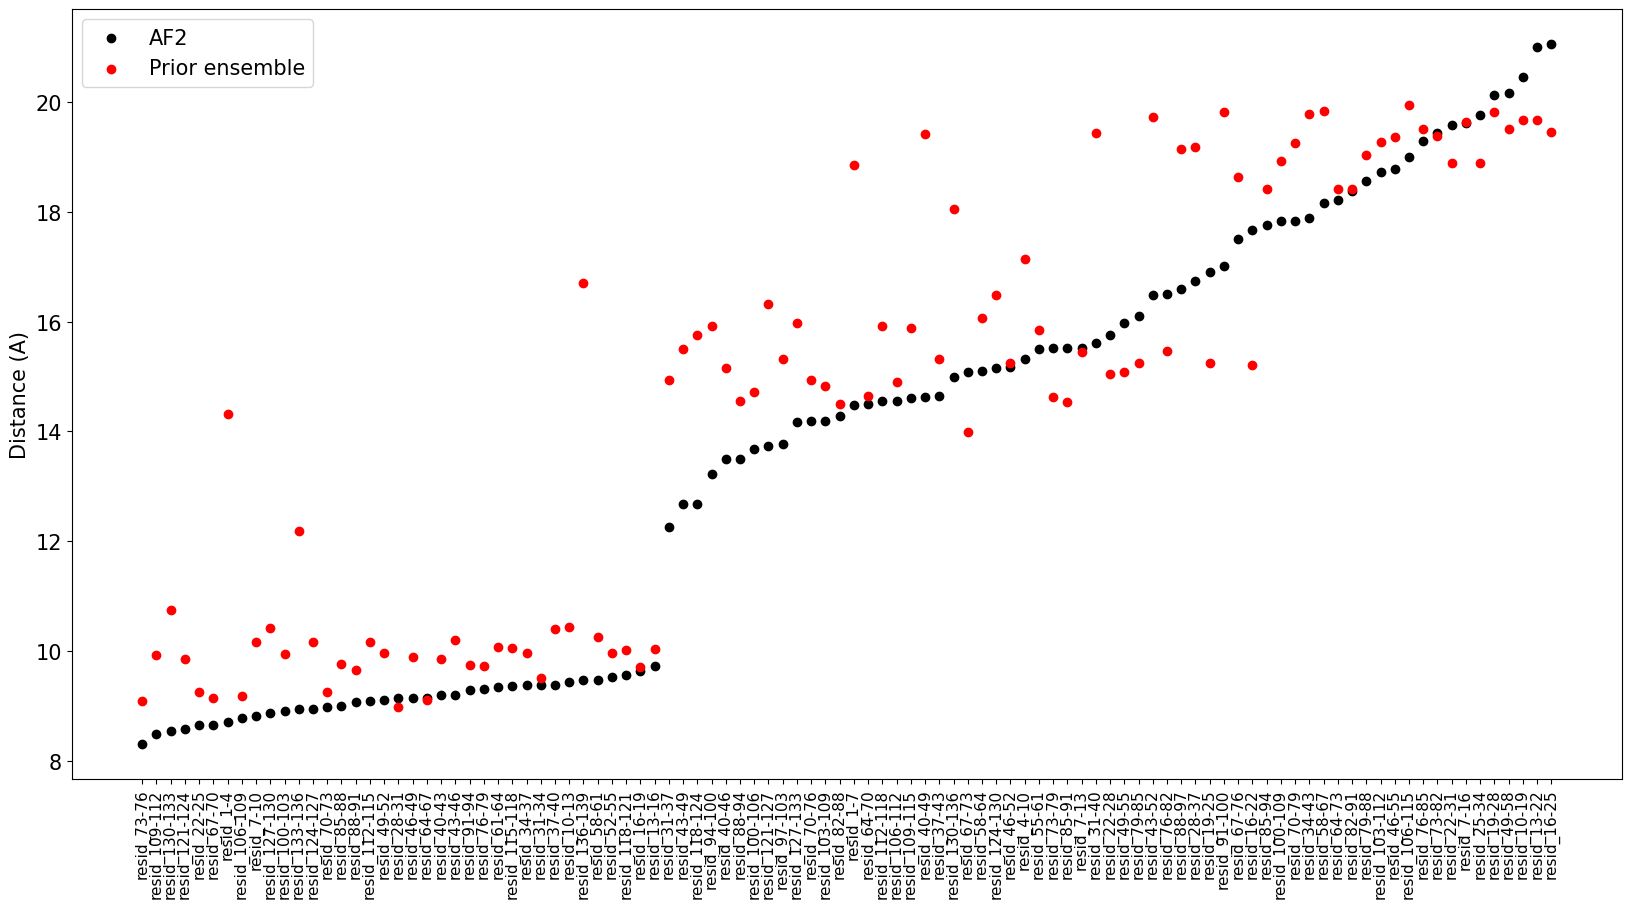

In [58]:
averages = np.average(calc[:,0:],axis=0)
idx_ordered = np.argsort(exp[:,0])

fig, ax = plt.subplots(figsize=(20, 10))

xx = range(len(labels))
plt.scatter(xx,exp[idx_ordered,0],c='k',label="AF2")


plt.scatter(xx,averages[idx_ordered],c='r',label="Prior ensemble")
plt.legend()
plt.ylabel("Distance (A)",size=15) 
plt.yticks(fontsize=15)
plt.legend(fontsize=15) 
_ = plt.xticks(xx,[labels[l] for l in idx_ordered],rotation=90,size=11)



# 2 BME reweighting

We are now ready to run the BME script. First, we have to import the module and specify the experimental/calculated datafiles 



In [59]:
import sys,os
import BME as BME
bme_dir = os.getcwd().split("notebook")[0]
sys.path.append(bme_dir)
print(bme_dir)

exp_file = data_f+"AF_contacts_constr.txt"
calc_file = data_f+"AF_contacts_calc.txt" 

print(exp_file)
print(calc_file)

/Volumes/BROTZAKIS/PROJECTS_LOCAL/ALPHA_IDP/BME_IDP/
/Volumes/BROTZAKIS/PROJECTS_LOCAL/ALPHA_IDP/asyn/mmseqs_calvados_allatoms/AF_contacts_constr.txt
/Volumes/BROTZAKIS/PROJECTS_LOCAL/ALPHA_IDP/asyn/mmseqs_calvados_allatoms/AF_contacts_calc.txt


And then we run the script itself

In [88]:


rew = BME.Reweight("example_AF_IDP")

print(rew)
# load the experimental and calculated datasets
rew.load(exp_file,calc_file)

# fit the data 
chi2_before, chi2_after, phi = rew.fit(theta=0.8)

# print statistics
print("Chi2 before BME %.2f" % chi2_before)
print("Chi2 after  BME %.2f" % chi2_after)
print("Fraction of effective frames %.2f" % phi)

Chi2 before BME 0.49
Chi2 after  BME 0.03
Fraction of effective frames 0.13


By definition the error before the fit is larger compared to the error after fitting. The ouptut of the fitting procedure is in essence a new set of weights.  These weights can be retrieved using the function

```
w_new = rew.get_weights()
```

And can be used to calculate any desired quantity (angle/distance distributions, averages, etc.)

We can first compare them to the initial weights  $w_0 = 1/n$


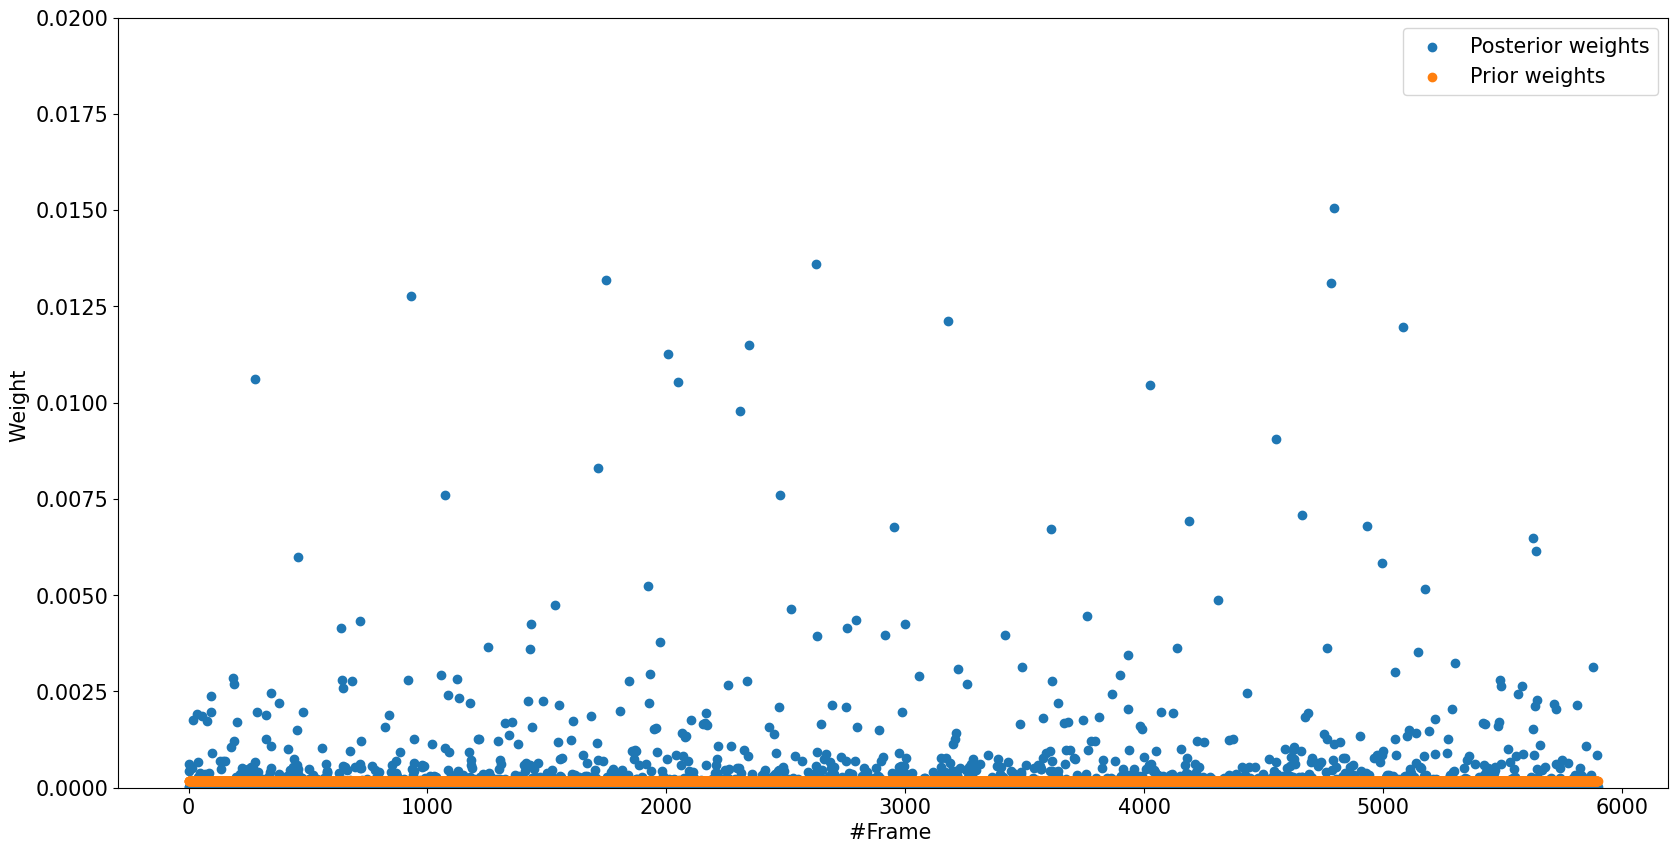

In [89]:
fig, ax = plt.subplots(figsize=(20, 10))
w0 = rew.get_w0()
w_new = rew.get_weights()

plt.scatter(range(len(w0)),w_new,label="Posterior weights")
plt.scatter(range(len(w0)),w0,label="Prior weights")
plt.ylim(0.00,0.02)
plt.legend()
plt.xlabel("#Frame ",size=15) 
plt.ylabel("Weight ",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15) 
plt.show()
plt.close()




We can see that the initial weights are all equal (each weight is 1/20000). While in the optimized weights some of them have a large weights, and many more have a weight which is almost zero. 
One possible way to quantify how much the weights are modified is given by the fraction of effective frame $\phi$.
When we choose a small parameter $theta$, the $\chi^2$ after minimization will be small, but at the cost of "throwing away" many samples (small $\phi$). 

For example, this is the expected behavior of $\phi$ and $\chi^2_{opt}/\chi^2_0$ for different values of theta.

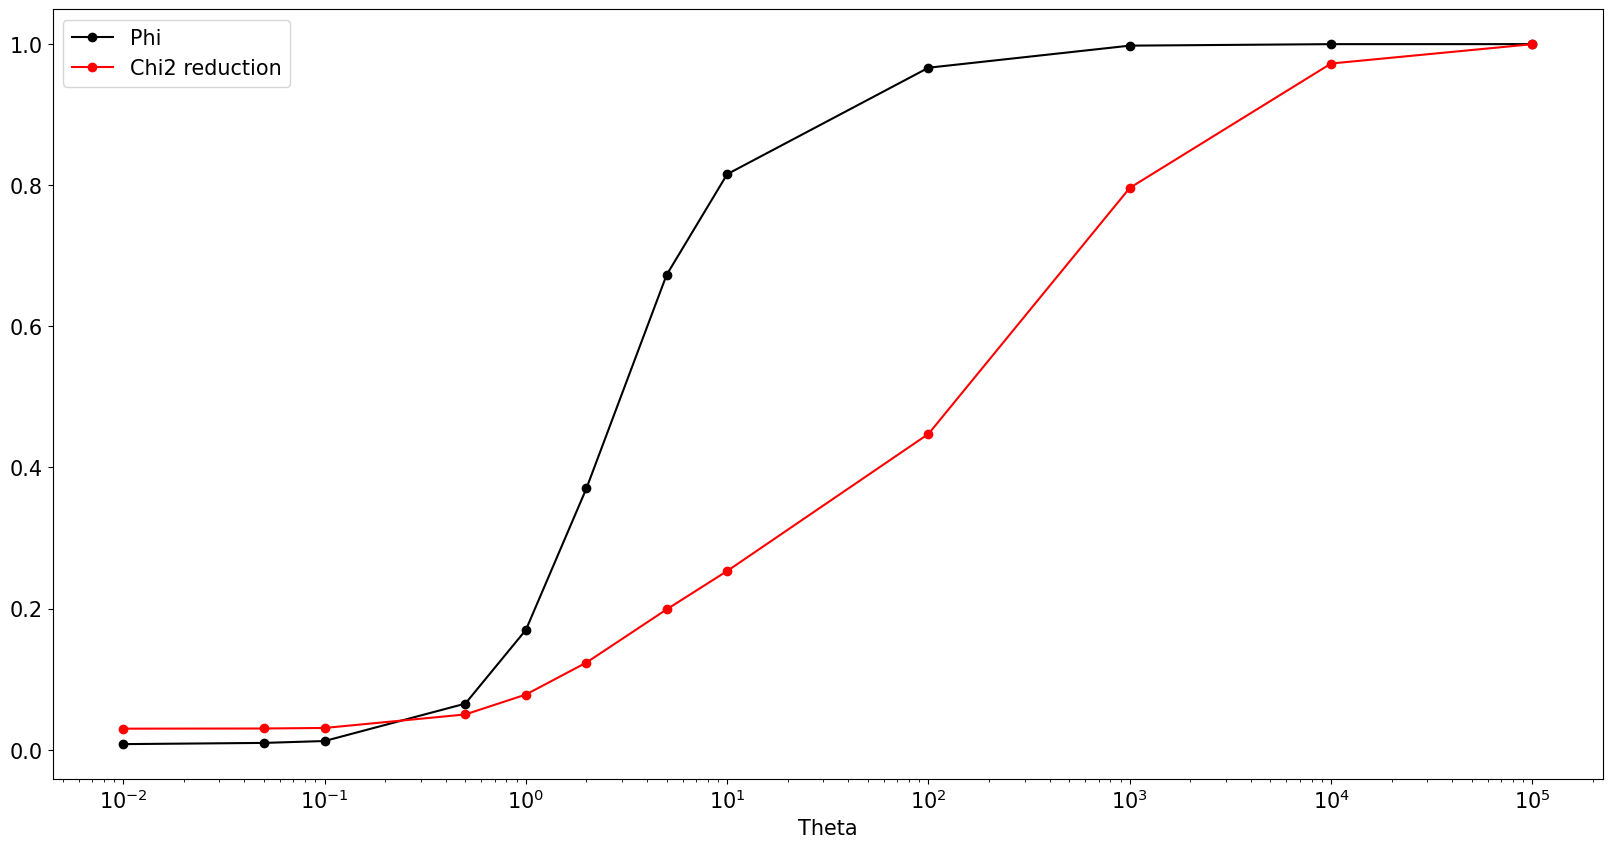

In [90]:
thetas = [0.01,0.05,0.1,0.5,1,2,5,10,100,1000,10000,100000]

fig, ax = plt.subplots(figsize=(20, 10))

chi2 = []
phis = []
for t in thetas:
    chi2_before, chi2_after, phi = rew.fit(theta=t)
    phis.append(phi)
    chi2.append(chi2_after/chi2_before)

plt.plot(thetas,phis,"-o",label="Phi",c="k")
plt.plot(thetas,chi2,"-o",label="Chi2 reduction",c="r")
plt.legend()
plt.xscale('log')
plt.xlabel("Theta",size=15)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15) 
plt.savefig(data_f+'optim_theta.pdf',bbox_inches='tight')




# 3. Use the optimized weights. 

The optimal weights can be used to calculate averages. BME provides a simple way of comparing the original with the optimized averages using the function

```
stats = rew.predict(exp_file,calc_file,out_file)
```

This function outputs some statistics and (optionally) a file with all the averages. Let's see it in action:

In [91]:
chi2_before, chi2_after, phi = rew.fit(theta=0.8)


stats = rew.predict(exp_file,calc_file,"example_AF_IDP")

print("%10s %10s %10s" % (" ","Original","Optimized"))
print("%10s %10.3f %10.3f" % ("Chi2",stats[0],stats[3]))
print("%10s %10.3f %10.3f" % ("RMSD",stats[1],stats[4]))
print("%10s %10d %10d" % ("Violations",stats[2],stats[5]))

print("--------------------------------------")
print("")



             Original  Optimized
      Chi2      0.487      0.033
      RMSD      1.770      0.553
Violations          5          0
--------------------------------------



The file "example_01_couplings" contains more info: the experimental average and error, and the calculated averages before and after reweighting. The last column indicates if the calculated averages are within the experimental error (0) or not (1). Therefore, 00 means that both the original and reweighted averages are within error, 10 means that only the reweighted average is within the error and so on. 


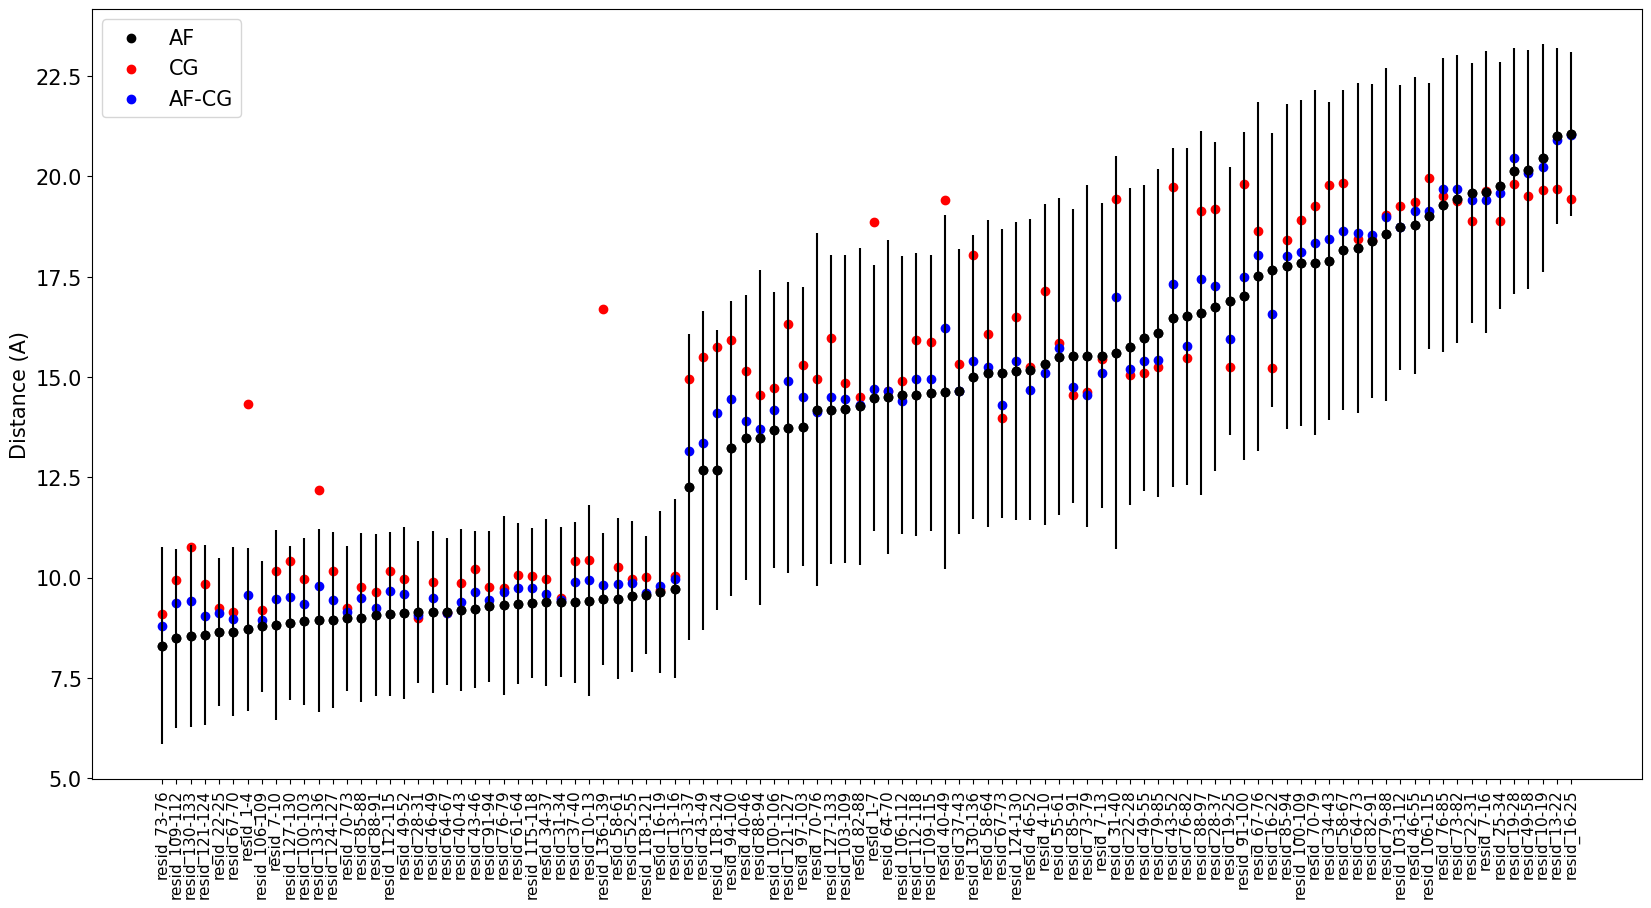

In [93]:

results = np.loadtxt("example_AF_IDP",usecols=(1,2,3,4,5))
labels = np.loadtxt("example_AF_IDP",usecols=(0),dtype=str)

# order by magnitude to make the plot nicer
idx_ordered = np.argsort(results[:,0])


fig, ax = plt.subplots(figsize=(20, 10))
xx = range(len(labels))
# plot experiment
plt.errorbar(xx, results[idx_ordered,0],results[idx_ordered,1],c='k',fmt="o",label="_no_legend")
plt.scatter(xx, results[idx_ordered,0],c='k',label="AF")


plt.scatter(xx,results[idx_ordered,2],c='r',label="CG")
plt.scatter(xx,results[idx_ordered,3],c='b',label="AF-CG")
plt.yticks(fontsize=15)
plt.legend(fontsize=15,loc="upper left") 

plt.ylabel("Distance (A)",size=15)
_ = plt.xticks(xx,[labels[l] for l in idx_ordered],rotation=90,size=11)


plt.savefig(data_f+'Prior_Posterior_AF2_distances.pdf',bbox_inches='tight')

This looks great. The alogrithm is doing exactly what it is supposed to do. We can further inspect C2-H1H2 and see what happens to the reweighted distribution:

5900


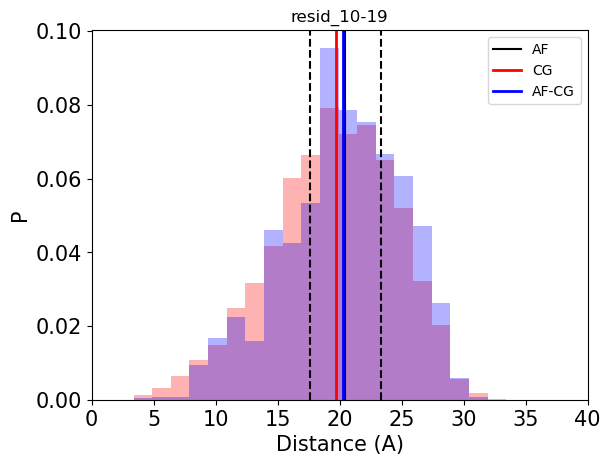

In [103]:
i=2
# plot experimental average and error
_ = plt.axvline(results[i-1,0],c='k',label="AF")
_ = plt.axvline(results[i-1,0]-results[i-1,1],c='k',linestyle="--")
_ = plt.axvline(results[i-1,0]+results[i-1,1],c='k',linestyle="--")

# Plot calculated average
average = np.average(calc[:,i-1])
_ = plt.axvline(average,c='r',label="CG",lw=2)

print(len(w_new))
average_optimized = np.average(calc[:,i-1],weights=w_new)
_ = plt.axvline(average_optimized,c='b',label="AF-CG",lw=2)

# plot histogram of the data
_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='r')

_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='b',weights=w_new)
plt.xlim(0,40)
plt.title(labels[i-1])
plt.xlabel("Distance (A)",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('P',fontsize=15)
plt.legend()
plt.savefig(data_f+str(labels[i-1])+'_post.pdf',bbox_inches='tight')


plt.show()
plt.close()

5900


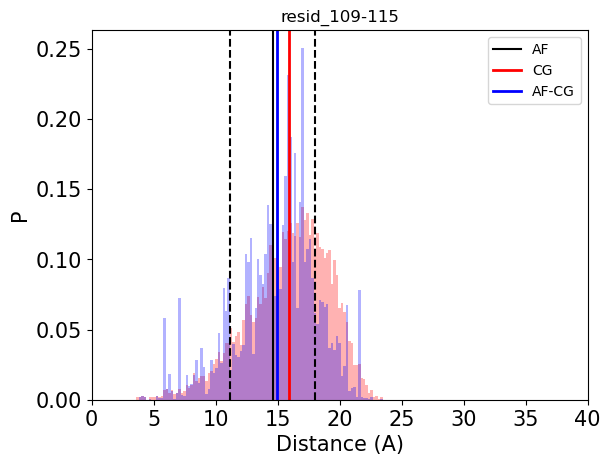

In [106]:
i=58
# plot experimental average and error
_ = plt.axvline(results[i-1,0],c='k',label="AF")
_ = plt.axvline(results[i-1,0]-results[i-1,1],c='k',linestyle="--")
_ = plt.axvline(results[i-1,0]+results[i-1,1],c='k',linestyle="--")

# Plot calculated average
average = np.average(calc[:,i-1])
_ = plt.axvline(average,c='r',label="CG",lw=2)

print(len(w_new))
average_optimized = np.average(calc[:,i-1],weights=w_new)
_ = plt.axvline(average_optimized,c='b',label="AF-CG",lw=2)

# plot histogram of the data
_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='r')

_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='b',weights=w_new)
plt.xlim(0,40)
plt.title(labels[i-1])
plt.xlabel("Distance (A)",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('P',fontsize=15)
plt.legend()
plt.savefig(data_f+str(labels[i-1])+'_post.pdf',bbox_inches='tight')

plt.show()
plt.close()

5900


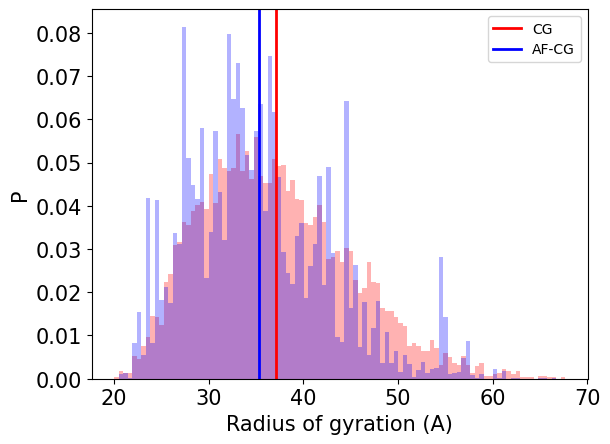

37.0725900226236 37.052191766758924 7.941613996645926
35.36516503950083 35.30537587168047 7.787785091088447


In [107]:
#Rg
# Plot calculated average
i=0
import numpy as np
import matplotlib
average = np.average(rg_A[:])
_ = plt.axvline(average,c='r',label="CG",lw=2)

print(len(w_new))
average_optimized = np.average(rg_A[:],weights=w_new)
_ = plt.axvline(average_optimized,c='b',label="AF-CG",lw=2)

# plot histogram of the data
_ = plt.hist(rg_A[:],bins=100,density=True,alpha=0.3,color='r')

_ = plt.hist(rg_A[:],bins=100,density=True,alpha=0.3,color='b',weights=w_new)




plt.xlabel('Radius of gyration (A)',fontsize=15)
plt.ylabel('P',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()


plt.savefig(data_f+'R_g.pdf',bbox_inches='tight')

plt.show()
plt.close()

#print(average_optimized)
counts, bins = np.histogram(rg_A[:])
mids = 0.5*(bins[1:] + bins[:-1])
probs = counts / np.sum(counts)

mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))

print(average,mean,sd)

counts, bins = np.histogram(rg_A[:],weights=w_new)
mids = 0.5*(bins[1:] + bins[:-1])
probs = counts / np.sum(counts)

mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))

print(average_optimized,mean,sd)

In [108]:

dssp=md.compute_dssp(traj,simplified='false')
print('dssp data shape', dssp.shape)
residuesALL=b = [i+1 for i in range(140)]
array2 = np.vstack((residuesALL,dssp))
dssp=np.c_[["" for x in range(len(array2))],array2]

df2=pd.DataFrame(data=dssp[1:,1:],
                index=dssp[1:,0],
                columns=dssp[0,1:])

print(pd.DataFrame(data=dssp[1:,1:],
                  index=dssp[1:,0],
                  columns=dssp[0,1:]))

df2.to_csv(data_f+'dssp.dat', header=True, index=None, sep=' ', mode='w')


dssp data shape (5900, 140)
    1  2  3  4  5  6  7  8  9 10  ... 131 132 133 134 135 136 137 138 139 140
    C  C  C  C  C  C  C  C  C  C  ...   C   C   C   C   C   C   C   C   C   C
    C  C  C  C  C  C  C  C  C  C  ...   C   C   C   C   C   C   C   C   C   C
    C  C  C  C  C  C  C  C  C  C  ...   C   C   C   C   C   C   C   C   C   C
    C  C  C  C  C  C  C  C  C  C  ...   C   C   C   C   C   C   C   C   C   C
    C  C  C  C  C  C  C  C  C  C  ...   C   C   C   C   C   C   C   C   C   C
.. .. .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
    C  C  C  C  C  C  C  C  C  C  ...   C   C   C   C   C   C   C   C   C   C
    C  C  C  C  C  C  C  C  C  C  ...   C   C   C   C   C   C   C   C   C   C
    C  C  C  C  C  C  C  C  C  C  ...   C   C   C   C   C   C   C   C   C   C
    C  C  C  C  C  C  C  C  C  C  ...   C   C   C   C   C   C   C   C   C   C
    C  C  C  C  C  C  C  C  C  C  ...   C   C   C   C   C   C   C   C   C   C

[5900 rows x 140 columns]


In [109]:

print(len(dssp)-1)

dsspC_resid=[]
dsspH_resid=[]
dsspE_resid=[]

for resid in range(1,141):
    dummyC=0
    dummyH=0
    dummyE=0
    for t in range(0,len(dssp)-1):
        t_i=t+1
       #print(weights_10[t],sasa[t_i][resid])
        if (dssp[t_i][resid] =='C'):
            dummyC+=float(w0[t])
        elif(dssp[t_i][resid] =='H'):
            dummyH+=float(w0[t])
        elif(dssp[t_i][resid] =='E'):
            dummyE+=float(w0[t])
        
    dsspC_resid.append(dummyC)
    dsspH_resid.append(dummyH)
    dsspE_resid.append(dummyE)
    print(resid,dummyC,dummyH,dummyE)


5900
1 1.0000000000001485 0 0
2 0.9983050847459107 0.0016949152542372879 0
3 0.998135593220487 0.0016949152542372879 0.00016949152542372882
4 0.995762711864554 0.0038983050847457615 0.00033898305084745765
5 0.9966101694916729 0.0033898305084745753 0
6 0.9955932203391302 0.003728813559322033 0.0006779661016949153
7 0.997288135593368 0.002203389830508474 0.0005084745762711864
8 0.9976271186442156 0.0018644067796610166 0.0005084745762711864
9 0.9971186440679443 0.0018644067796610166 0.001016949152542373
10 0.9974576271187918 0.0013559322033898304 0.0011864406779661016
11 0.9986440677967583 0.0008474576271186442 0.0005084745762711864
12 0.9979661016950632 0.0013559322033898304 0.0006779661016949153
13 0.9967796610170967 0.0018644067796610166 0.0013559322033898304
14 0.9954237288137064 0.003559322033898304 0.001016949152542373
15 0.9940677966103162 0.005084745762711863 0.0008474576271186442
16 0.99423728813574 0.005254237288135592 0.0005084745762711864
17 0.9947457627120113 0.00423728813559

140


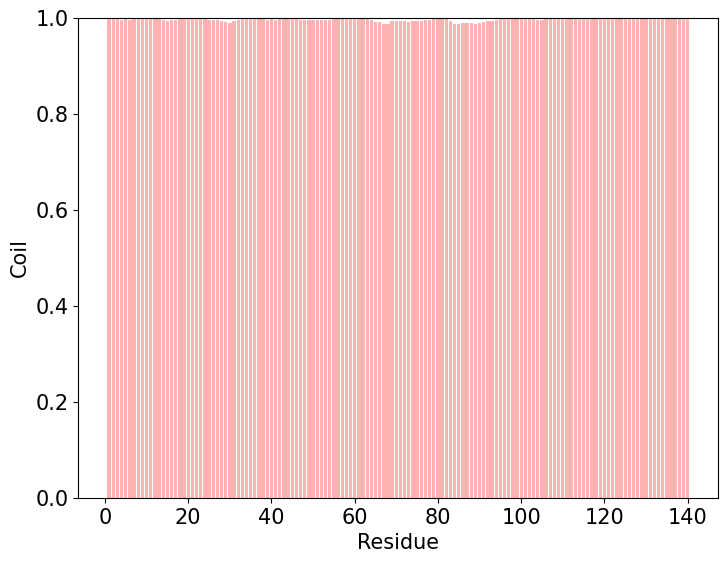

In [110]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(len(dsspC_resid))
ax.bar(residuesALL,dsspC_resid,color="red",alpha=0.3)
plt.ylim(0,1)
plt.xlabel('Residue',fontsize=15)
plt.ylabel('Coil',fontsize=15)

ax.tick_params(axis='both', labelsize=15)

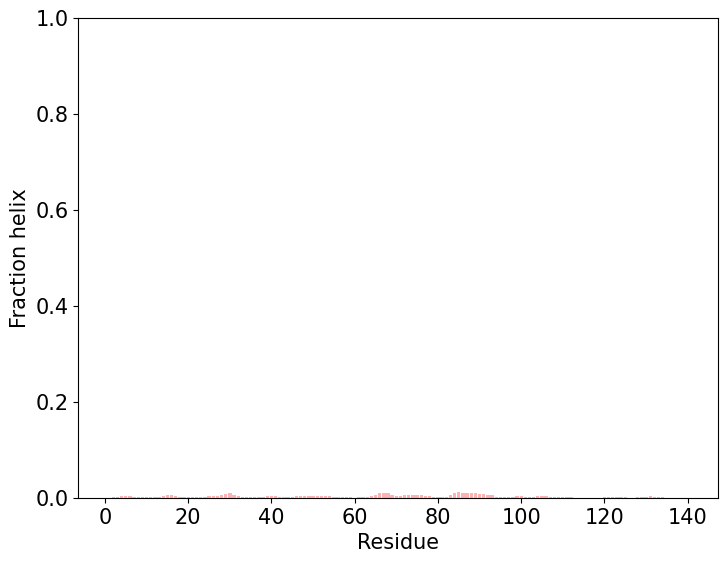

In [111]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residuesALL,dsspH_resid,color="red",alpha=0.3)
plt.ylim(0,1)
plt.xlabel('Residue',fontsize=15)
plt.ylabel('Fraction helix',fontsize=15)

ax.tick_params(axis='both', labelsize=15)

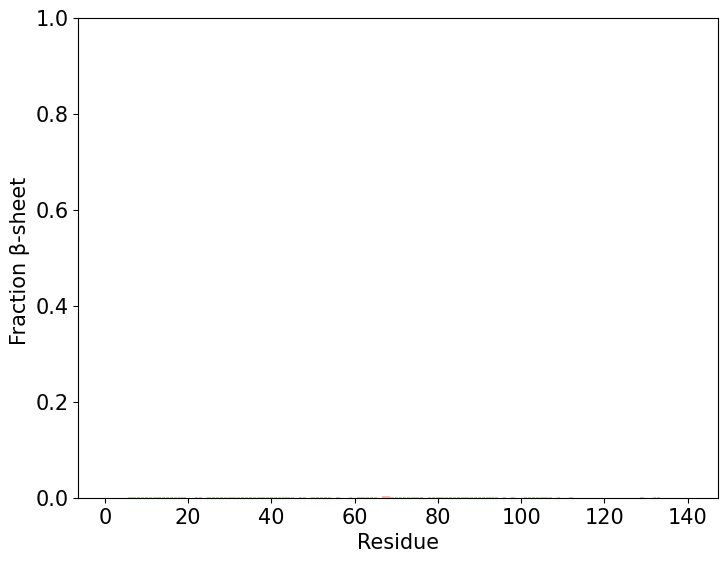

In [112]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residuesALL,dsspE_resid,color="red",alpha=0.3)
plt.ylim(0,1)
plt.xlabel('Residue',fontsize=15)
plt.ylabel('Fraction β-sheet ',fontsize=15)

ax.tick_params(axis='both', labelsize=15)

In [113]:

print(len(dssp)-1)

dsspC_resid_w=[]
dsspH_resid_w=[]
dsspE_resid_w=[]

for resid in range(1,141):
    dummyC=0
    dummyH=0
    dummyE=0
    for t in range(0,len(dssp)-1):
        t_i=t+1
       #print(weights_10[t],sasa[t_i][resid])
        if (dssp[t_i][resid] =='C'):
            dummyC+=float(w_new[t])
        elif(dssp[t_i][resid] =='H'):
            dummyH+=float(w_new[t])
        elif(dssp[t_i][resid] =='E'):
            dummyE+=float(w_new[t])
        
    dsspC_resid_w.append(dummyC)
    dsspH_resid_w.append(dummyH)
    dsspE_resid_w.append(dummyE)
    print(resid,dummyC,dummyH,dummyE)



5900
1 0.9999999999999998 0 0
2 0.9971419462699468 0.0028580537300531383 0
3 0.9969671706651742 0.0028580537300531383 0.0001747756047725552
4 0.9963245620404727 0.0036579435727002365 1.7494386826867256e-05
5 0.9988401709846847 0.0011598290153152072 0
6 0.9959785334852709 0.00381121457961172 0.00021025193511698385
7 0.9966528176483646 0.0032796443374474254 6.753801418763593e-05
8 0.995843287456513 0.0041190905614362 3.7621982050620245e-05
9 0.9985147608151993 0.0013957361505958024 8.950303420494011e-05
10 0.9984062321508151 0.0012736841153667302 0.0003200837338181461
11 0.9998745837034461 5.8085907396273785e-05 6.733038915756093e-05
12 0.999246730697624 0.0007312739347012799 2.1995367674768055e-05
13 0.9981255112596316 0.0015523062878628237 0.0003221824525057117
14 0.9967499977389715 0.0029304451433199703 0.000319557117708289
15 0.9956696259244396 0.0038084270231520207 0.0005219470524078459
16 0.9963666554755483 0.003391872292939532 0.00024147223151210157
17 0.9961825498132263 0.0032929

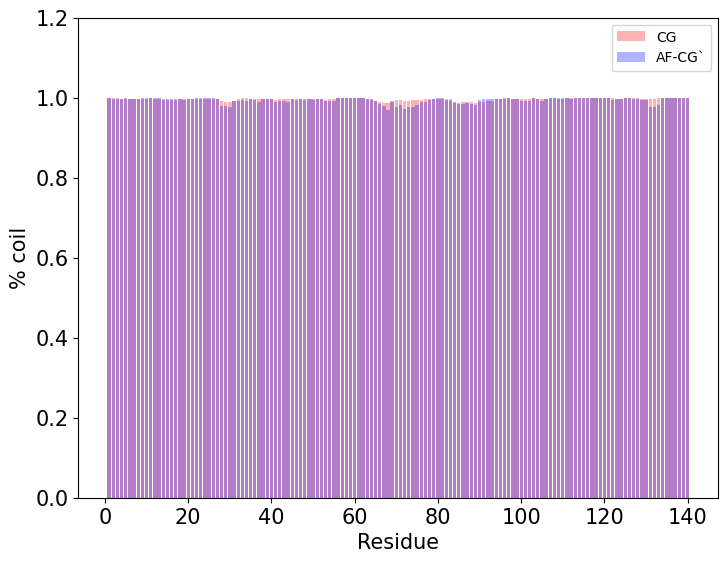

In [116]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residuesALL,dsspC_resid,color="r",alpha=0.3,label="CG")
ax.bar(residuesALL,dsspC_resid_w,color="b",alpha=0.3,label="AF-CG`")
plt.ylim(0,1.2)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.xlabel('Residue',fontsize=15)
plt.ylabel('% coil',fontsize=15)
#plt.legend(fontsize=20,loc=1,prop={'size': 5})
ax.tick_params(axis='both', labelsize=15)
ax.legend()
plt.savefig(data_f+'coil.pdf',bbox_inches='tight')



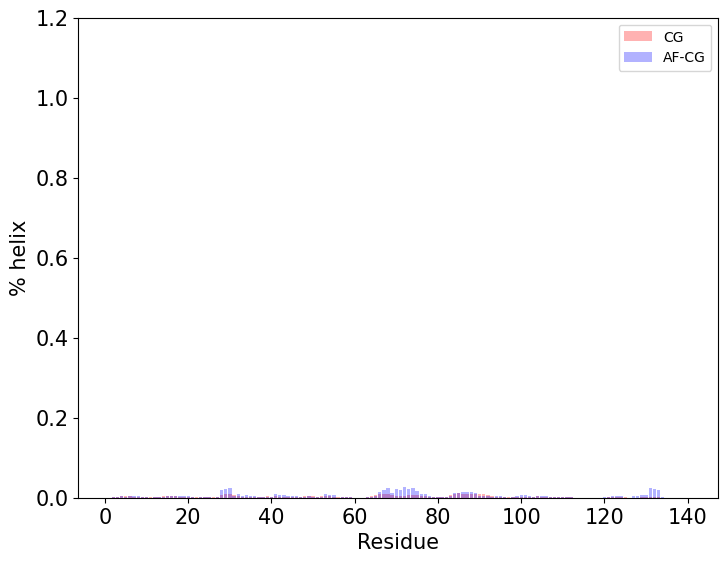

In [117]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residuesALL,dsspH_resid,color="r",alpha=0.3,label="CG")
ax.bar(residuesALL,dsspH_resid_w,color="b",alpha=0.3,label="AF-CG")
plt.ylim(0,1.2)


plt.xlabel('Residue',fontsize=15)
plt.ylabel('% helix',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

#plt.legend(fontsize=20,loc=1,prop={'size': 5})
ax.tick_params(axis='both', labelsize=15)
ax.legend()
plt.savefig(data_f+'helix.pdf',bbox_inches='tight')



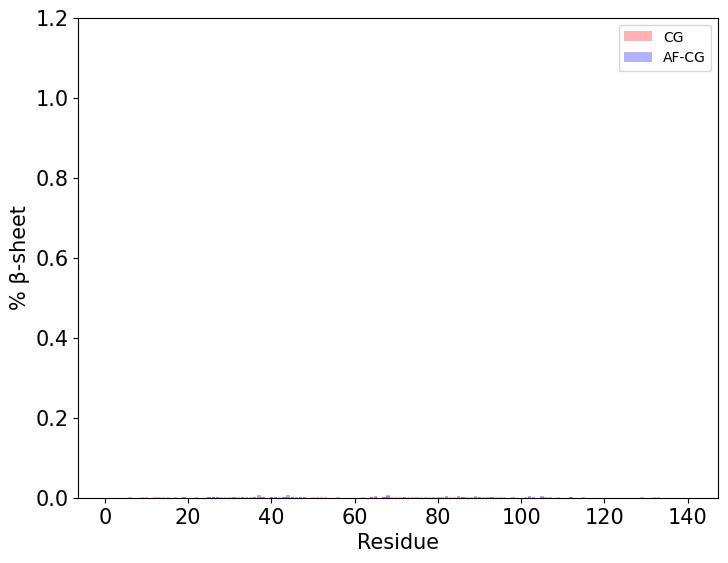

In [118]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residuesALL,dsspE_resid,color="r",alpha=0.3,label="CG")
ax.bar(residuesALL,dsspE_resid_w,color="b",alpha=0.3,label="AF-CG")
plt.ylim(0,1.2)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Residue',fontsize=15)
plt.ylabel('% β-sheet',fontsize=15)

ax.tick_params(axis='both', labelsize=15)
ax.legend()
plt.savefig(data_f+'beta.pdf',bbox_inches='tight')

In [140]:
import itertools
import os
from pathlib import Path
N = 200
n_rounds = 1

folder = Path(data_f)
n_frames = traj.n_frames
inds = np.arange(n_frames)
ca_inds = topology.select("name CA")
protein_inds= topology.select("protein")

for i in range(n_rounds):
    (folder  / f"r{i}").mkdir(exist_ok=True)

    inds_sample = np.random.choice(inds, size=N, replace=False,p=w_new)
    traj[inds_sample].atom_slice(ca_inds).save_pdb((folder / f"r{i}" / f"conf-ca.pdb").as_posix())
    traj[inds_sample].atom_slice(protein_inds).save_pdb((folder / f"r{i}" / f"conf-protein.pdb").as_posix())

## Experimental comparison to NMR chem-shifts

In [41]:
f=open(data_f+'plumed_NMR.dat', 'w')
f.write("MOLINFO STRUCTURE="+str(pdb)+"\n")
f.write("WHOLEMOLECULES ENTITY0=1-2016\n")
f.write("cs: CS2BACKBONE ATOMS=1-2016 DATADIR="+str(data_f)+"nmr_data/"+" NOPBC TEMPLATE=../priors/topol_asyn_C2.pdb\n")
f.write("PRINT ARG=* FILE=COLVAR_SHIFTS STRIDE=1\n")
f.close()

In [42]:
%%bash
plumed driver --mf_xtc ../priors/asyn_C2.xtc --plumed plumed_NMR.dat


DRIVER: Found molfile format trajectory xtc with name ../calvados_trajectory/asyn/asyn_bm_em.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0-dev (git: ba982d341) compiled on Feb 15 2021 at 19:38:30
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /Users/fdn/PLUMED/
PLUMED: For installed feature, see /Users/fdn/PLUMED//src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 2016
PLUMED: File suffix: 
PLUMED: FILE: plumed_NMR.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named /Volumes/BROTZAKIS/PROJECTS_LOCAL/ALPHA_IDP/asyn/mmseqs_calvados_allatoms/../calvados_trajectory/asyn/asyn_1_em.pdb contains 1 chains 
PLUMED:   chain named   contains residues 1 to 140 and atoms 1 to 2016 
PLUMED: Action WHOLEMOLECULES

In [120]:
#Load in CAMSHIFT output from PLUMED using pandas 
#!!!!Note that since one neads to remove the ""#! Fields" label from the COLVAR_SHIFTS file before performing the analysis below.!!!

csAB = pd.read_csv(str(data_f)+'/COLVAR_SHIFTS', delim_whitespace=True)

In [121]:
#Make dictionaries of different chemical shift types
#For AB alone:
csAB_dict = {'ca': np.asarray(csAB.loc[:, 'cs.ca-0-3':'cs.ca-0-137']), 'cb': np.asarray(csAB.loc[:, 'cs.cb-0-3':'cs.cb-0-137']),
             'co': np.asarray(csAB.loc[:, 'cs.co-0-3':'cs.co-0-137']), 
             'hn': np.asarray(csAB.loc[:, 'cs.hn-0-3':'cs.hn-0-137']), 'nh': np.asarray(csAB.loc[:, 'cs.nh-0-3':'cs.nh-0-137'])}


#For data (shared between both sets of simulations)
data_dict = {'ca': np.asarray(csAB.loc[:, 'cs.expca-0-3':'cs.expca-0-137']), 'cb': np.asarray(csAB.loc[:, 'cs.expcb-0-3':'cs.expcb-0-137']),
             'co': np.asarray(csAB.loc[:, 'cs.expco-0-3':'cs.expco-0-137']),
             'hn': np.asarray(csAB.loc[:, 'cs.exphn-0-3':'cs.exphn-0-137']), 'nh': np.asarray(csAB.loc[:, 'cs.expnh-0-3':'cs.expnh-0-137'])}



cs_residues = {'ca': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,112,113,114,115,116,118,119,121,122,123,124,125,126,127,129,130,131,132,133,134,135,136,137],
               'cb': [3,4,5,6,8,9,10,11,12,15,16,17,18,19,20,21,22,23,26,27,28,29,30,32,33,34,37,38,39,40,44,45,48,49,52,53,54,55,56,57,58,59,60,61,63,64,66,69,70,71,72,74,75,76,77,78,80,81,82,83,85,87,89,90,91,92,94,95,96,97,98,100,103,104,105,107,110,113,114,115,116,118,119,121,122,123,124,125,126,127,129,130,131,133,135,136,137],
               'co': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,107,109,110,111,112,113,114,115,116,118,119,121,122,123,124,125,126,127,129,130,131,132,133,134,135,136,137],
               'hn': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,112,113,114,115,116,118,119,121,122,123,124,125,126,127,129,130,131,132,133,134,135,136,137],
               'nh': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,112,113,114,115,116,118,119,121,122,123,124,125,126,127,129,130,131,132,133,134,135,136,137]}



In [123]:
import math
csAB_means = {'ca': [],
               'cb': [],
               'co': [],
               'hn': [],
               'nh': []}

csAB_means_AF = {'ca': [],
               'cb': [],
               'co': [],
               'hn': [],
               'nh': []}

rmsderr = {'ca': [],
               'cb': [],
               'co': [],
               'hn': [],
               'nh': []}

rmsderr_AF = {'ca': [],
               'cb': [],
               'co': [],
               'hn': [],
               'nh': []}

csAB_std = {'ca': [],
               'cb': [],
               'co': [],
               'hn': [],
               'nh': []}

csAB_std_AF = {'ca': [],
               'cb': [],
               'co': [],
               'hn': [],
               'nh': []}

for k in cs_residues.keys():
    rmsd=0
    rmsd_AF=0
    val=0.
    diff=0
    diff_AF=0
    for j in range(0,len(csAB_dict[k][0])):

        csAB_means[k].append(np.average(csAB_dict[k][:,j]))

        
        csAB_means_AF[k].append(np.average(csAB_dict[k][:,j],weights=w_new))
 
        
        v1=np.average(csAB_dict[k][:,j])
        v2=np.average(csAB_dict[k][:,j],weights=w_new)
        v3=data_dict[k][0][j]
        diff+=math.pow(v1-v3,2.0)
        diff_AF+=math.pow(v2-v3,2.0)
    
    print('rmsd',k,math.sqrt(diff/float(len(csAB_dict[k][0]))),'rmsd_AF',k,math.sqrt(diff_AF/float(len(csAB_dict[k][0]))))
    rmsderr[k].append(math.sqrt(diff/float(len(csAB_dict[k][0]))))
    rmsderr_AF[k].append(math.sqrt(diff_AF/float(len(csAB_dict[k][0]))))

rmsd ca 0.8192551467885534 rmsd_AF ca 0.8030032842953178
rmsd cb 1.2448733619742376 rmsd_AF cb 1.1855637800793317
rmsd co 0.9100491605864349 rmsd_AF co 0.8875101146300726
rmsd hn 0.15367116504228226 rmsd_AF hn 0.1452333380530037
rmsd nh 2.910288349262478 rmsd_AF nh 2.893381627209768


1.3
1.36
1.38
0.56
3.01
0.8192551467885534
1.2448733619742376
0.9100491605864349
0.15367116504228226
2.910288349262478
('ca', [0.8192551467885534])
('cb', [1.2448733619742376])
('co', [0.9100491605864349])
('hn', [0.15367116504228226])
('nh', [2.910288349262478])


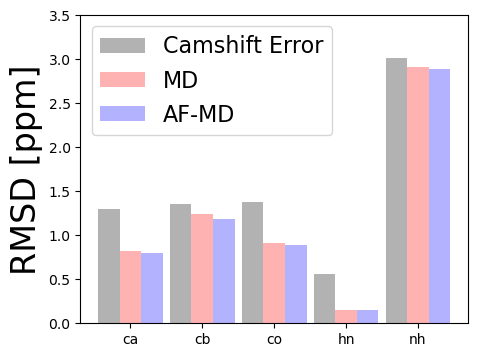

In [124]:
err = {"NH": 3.01, "HN": 0.56, "CA": 1.3, "CB": 1.36, "CO": 1.38}

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
for d in sorted(tuple(err.items())):
    print (d[1])
for d in sorted(tuple(rmsderr.items())):
    print(d[1][0])
    #float("{}.{}".format(*d[1]))
    
ax.bar(np.arange(5)-0.3, [d[1] for d in sorted(tuple(err.items()))], capsize=8,
       color='black', alpha=0.3, label="Camshift Error",width=0.3)
for d in sorted(tuple(rmsderr.items())):
    print(d)

ax.bar(np.arange(5), [d[1][0] for d in sorted(tuple(rmsderr.items()))] ,
       capsize=8, color='red',alpha=0.3, label="MD",width=0.3)
ax.bar(np.arange(5)+.3, [d[1][0] for d in sorted(tuple(rmsderr_AF.items()))] ,
       capsize=8, color='blue',alpha=0.3, label="AF-MD",width=0.3)
ax.set_xticks(np.arange(5))
ax.set_xticklabels([d for d in rmsderr])

ax.set_ylabel("RMSD [ppm]", fontsize=24)
ax.set_ylim(0, 3.5)

ax.legend(fontsize=16)
plt.savefig(data_f+'RMSD_err.pdf',bbox_inches='tight')




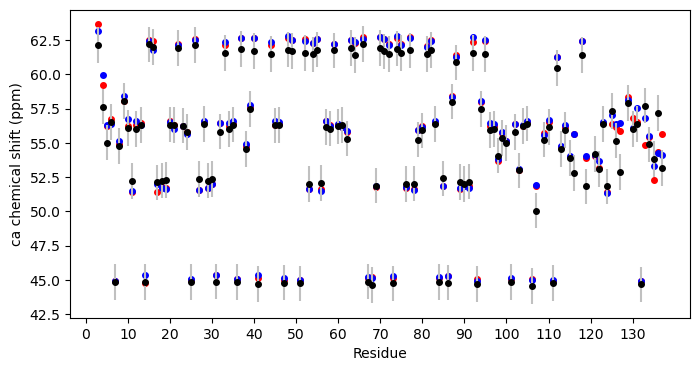

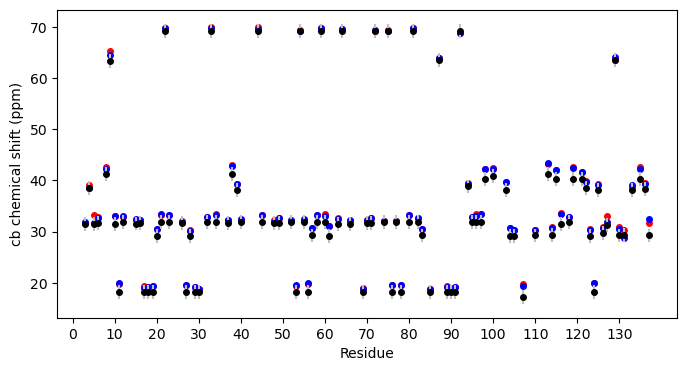

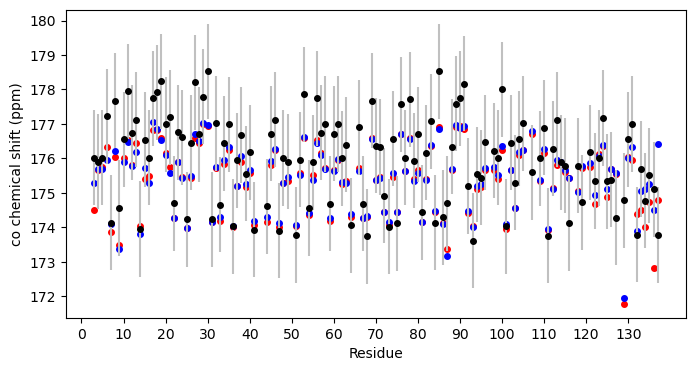

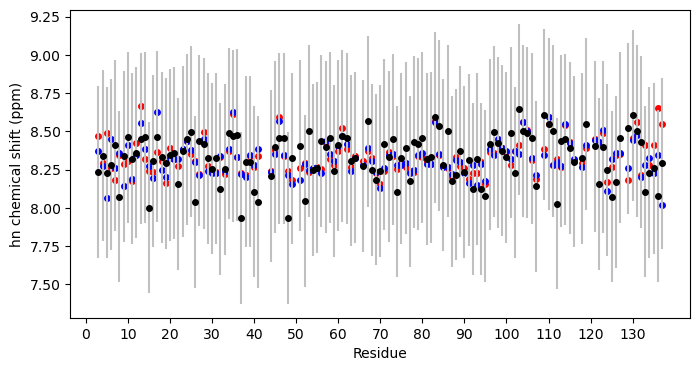

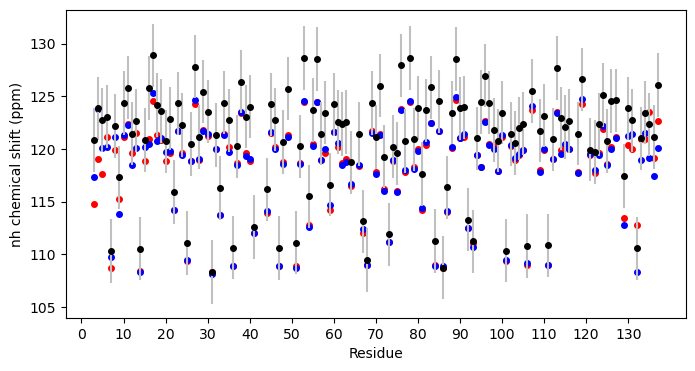

In [125]:
#Plot camshift 
camshift_errs = {'ca': 1.3, 'cb': 1.36, 'co': 1.38, 'hn': 0.56, 'nh': 3.01}

for k in cs_residues.keys():
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(111)
    yerror = [ camshift_errs[k] for i in range(len(cs_residues[k]))]
    ax.errorbar(cs_residues[k], data_dict[k].mean(axis=0), yerr=yerror, fmt='o', markersize='4', color='black', ecolor='silver')


    ax.scatter(cs_residues[k], csAB_means[k], color='red',s=4**2)
    ax.scatter(cs_residues[k], csAB_means_AF[k], color='blue',s=4**2)
    ax.set_xlabel("Residue")
    ax.set_ylabel("{} chemical shift (ppm)".format(k))

    ax.set_xticks(np.arange(0, 137, step=10));
    plt.savefig(str(data_f)+'/'+str(k)+'_CS_asyn.pdf'.format(i), format='pdf', dpi=2000, transparent=True)